In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_link = 'https://drive.google.com/file/d/1kMLt4PEtD7G9gBeXaCIwayG8d8p_qcBc/view?usp=sharing'
file_id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(new_link)

In [3]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [4]:
# Drop unnecessary columns
df.drop(columns=['title', 'net', 'location'], inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,continent,country
0,6.5,16-08-2023 12:47,7,4,green,0,657,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,NaN,Vanuatu
1,6.5,19-07-2023 00:22,8,6,yellow,0,775,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN
2,6.6,17-07-2023 03:05,7,5,green,0,899,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina
3,7.2,16-07-2023 06:48,6,6,green,1,860,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,NaN
4,7.3,16-07-2023 06:48,0,5,NaN,1,820,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,NaN


In [5]:
# Handle missing values
essential_columns = ['magnitude', 'depth', 'latitude', 'longitude']

# Drop rows where essential data is missing
df.dropna(subset=essential_columns, inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,continent,country
0,6.5,16-08-2023 12:47,7,4,green,0,657,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,NaN,Vanuatu
1,6.5,19-07-2023 00:22,8,6,yellow,0,775,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN
2,6.6,17-07-2023 03:05,7,5,green,0,899,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina
3,7.2,16-07-2023 06:48,6,6,green,1,860,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,NaN
4,7.3,16-07-2023 06:48,0,5,NaN,1,820,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,NaN


In [6]:
# Convert 'date_time' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df.head()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,continent,country
0,6.5,2023-08-16 12:47:00,7,4,green,0,657,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,NaN,Vanuatu
1,6.5,2023-07-19 00:22:00,8,6,yellow,0,775,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN
2,6.6,2023-07-17 03:05:00,7,5,green,0,899,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina
3,7.2,2023-07-16 06:48:00,6,6,green,1,860,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,NaN
4,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,NaN


In [7]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['alert', 'magType'], drop_first=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,...,alert_red,alert_yellow,magType_mb,magType_md,magType_ml,magType_ms,magType_mw,magType_mwb,magType_mwc,magType_mww
0,6.5,2023-08-16 12:47:00,7,4,0,657,114,7.177000,25.0,192.955,...,False,False,False,False,False,False,False,False,False,True
1,6.5,2023-07-19 00:22:00,8,6,0,775,92,0.679000,40.0,69.727,...,False,True,False,False,False,False,False,False,False,True
2,6.6,2023-07-17 03:05:00,7,5,0,899,70,1.634000,28.0,171.371,...,False,False,False,False,False,False,False,False,False,True
3,7.2,2023-07-16 06:48:00,6,6,1,860,173,0.907000,36.0,32.571,...,False,False,False,False,False,False,False,False,False,True
4,7.3,2023-07-16 06:48:00,0,5,1,820,79,0.879451,172.8,21.000,...,False,False,False,False,False,False,False,False,False,False


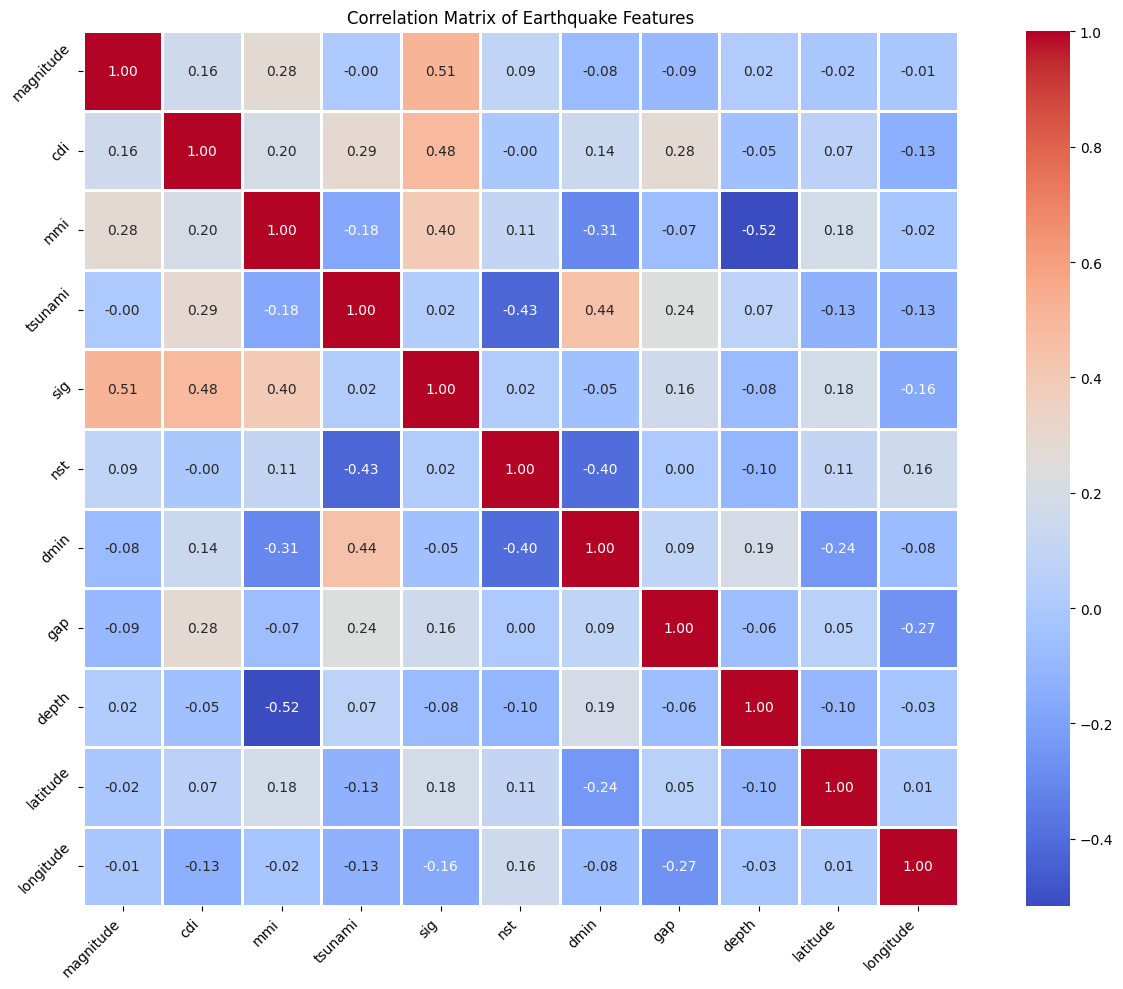

In [8]:
# Create and display correlation matrix for numeric features
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths = 1)
plt.title("Correlation Matrix of Earthquake Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

sampled_data = df

# Using IQR (Interquartile Range) method to remove outliers
numeric_cols = sampled_data.select_dtypes(include=[np.number])   # Only numeric columns will remain

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

mask = ~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
sampled_data = sampled_data[mask]

numeric_cols = sampled_data.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.dropna(axis=1)                      # drop cols with NaN
numeric_cols = numeric_cols.loc[:, numeric_cols.std() > 0]      # drop constant cols

z_scores = np.abs(stats.zscore(numeric_cols))
mask_z = (z_scores < 3).all(axis=1)

sampled_data = sampled_data[mask_z]


print(sampled_data.shape)
sampled_data.head()

(593, 25)


,magnitude,date_time,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,...,alert_red,alert_yellow,magType_mb,magType_md,magType_ml,magType_ms,magType_mw,magType_mwb,magType_mwc,magType_mww
1,6.5,2023-07-19 00:22:00,8,6,0,775,92,0.679,40.0,69.727,...,False,True,False,False,False,False,False,False,False,True
3,7.2,2023-07-16 06:48:00,6,6,1,860,173,0.907,36.0,32.571,...,False,False,False,False,False,False,False,False,False,True
5,6.6,2023-07-10 20:28:00,5,4,1,802,95,2.454,37.0,10.000,...,False,False,False,False,False,False,False,False,False,True
9,7.1,2023-05-20 01:51:00,3,4,1,777,98,2.812,56.0,35.981,...,False,False,False,False,False,False,False,False,False,True
10,7.7,2023-05-19 02:57:00,5,4,1,927,277,3.111,15.0,18.027,...,False,False,False,False,False,False,False,False,False,True


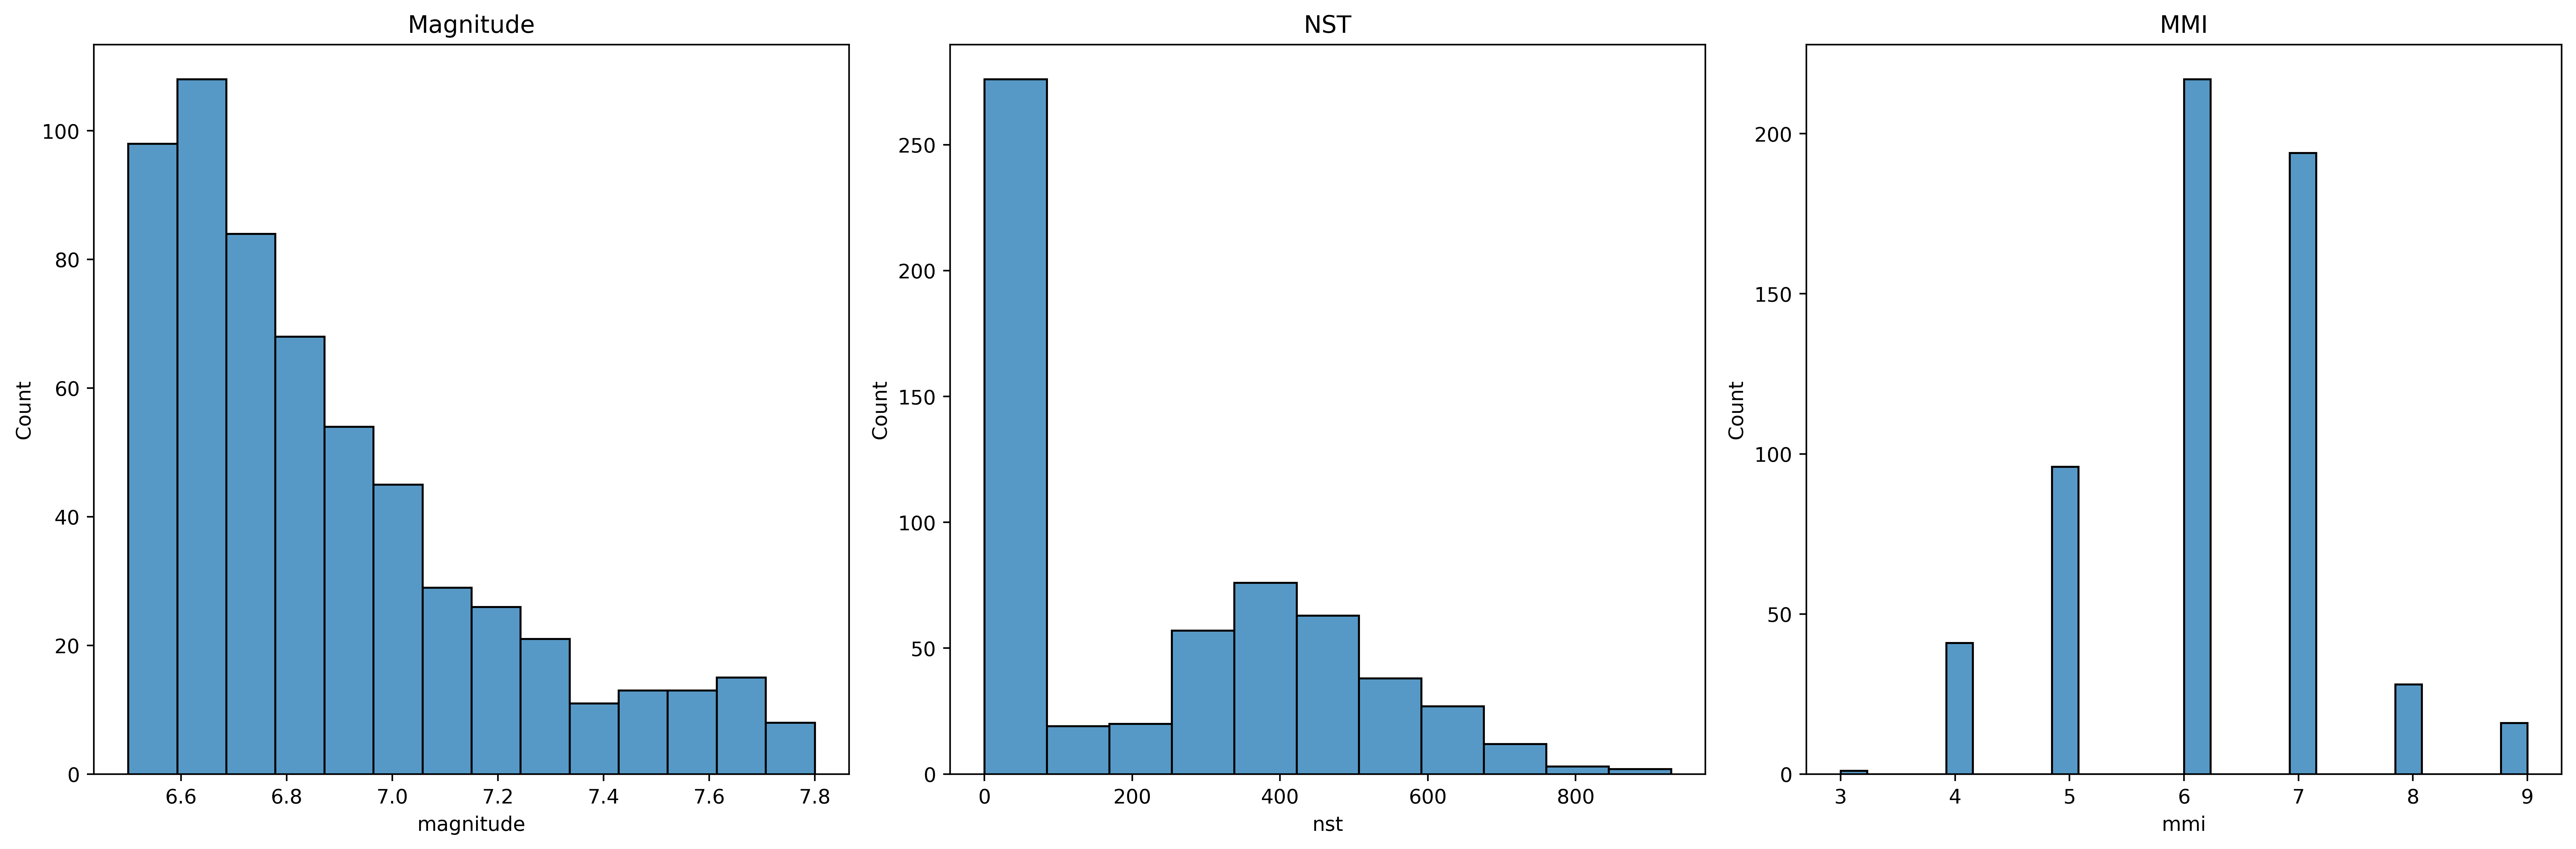

In [10]:
fig_hist, (ax_magnitude, ax_nst, ax_mmi) = plt.subplots(1, 3, figsize = (18, 6), dpi = 500)

plot_data = [('magnitude', ax_magnitude, "Magnitude"),
             ('nst', ax_nst, "NST"),
             ('mmi', ax_mmi, "MMI")]

for data_column, axis, title in plot_data:
    sns.histplot(data = sampled_data, x = data_column, ax = axis)
    axis.set_title(title)

plt.tight_layout()
plt.show()

In [11]:
from scipy import stats

Text(0, 0.5, 'magnitude')

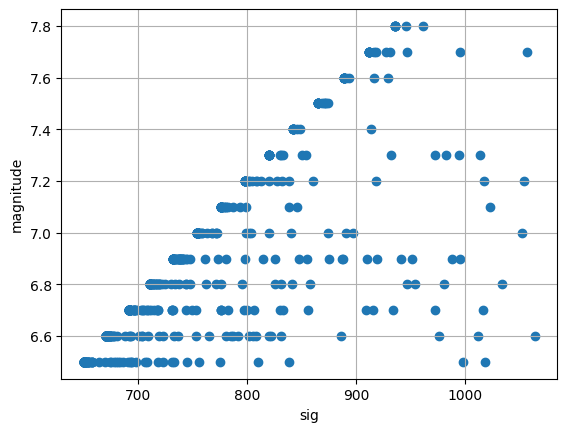

In [12]:
X=np.array(sampled_data.loc[:,'sig'].values.reshape(-1, 1))
Y=np.array(sampled_data.loc[:,'magnitude'].values.reshape(-1, 1))

plt.scatter(X, Y)
plt.grid()
plt.xlabel("sig")
plt.ylabel("magnitude")

# **Random Forest Regressor**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
# Select features and target
X = sampled_data[['sig', 'nst', 'mmi', 'depth', 'latitude', 'longitude','cdi']]
y = sampled_data['magnitude']

# Clean
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [15]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train.ravel())

# Predict
y_pred = rf.predict(X_test)

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.788
RMSE: 0.140
MAE: 0.065


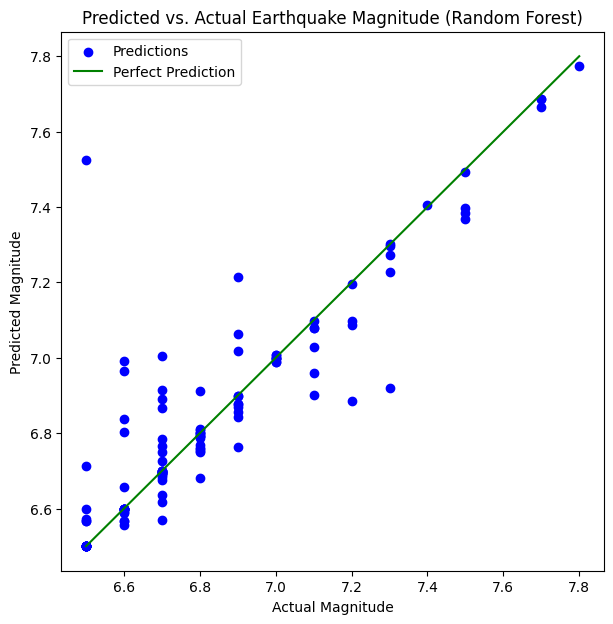

In [16]:
# Plot predicted magnitude vs the actual magnitude
plt.figure(figsize = (7, 7))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')

# Define range for perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# In the line below - the perfect prediction (100% acuracy) line goes from min value of x and y axis to max value of x and y axis
plt.plot([min_val, max_val], [min_val, max_val], 'g-', label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Predicted vs. Actual Earthquake Magnitude (Random Forest)')
plt.legend()
plt.show()

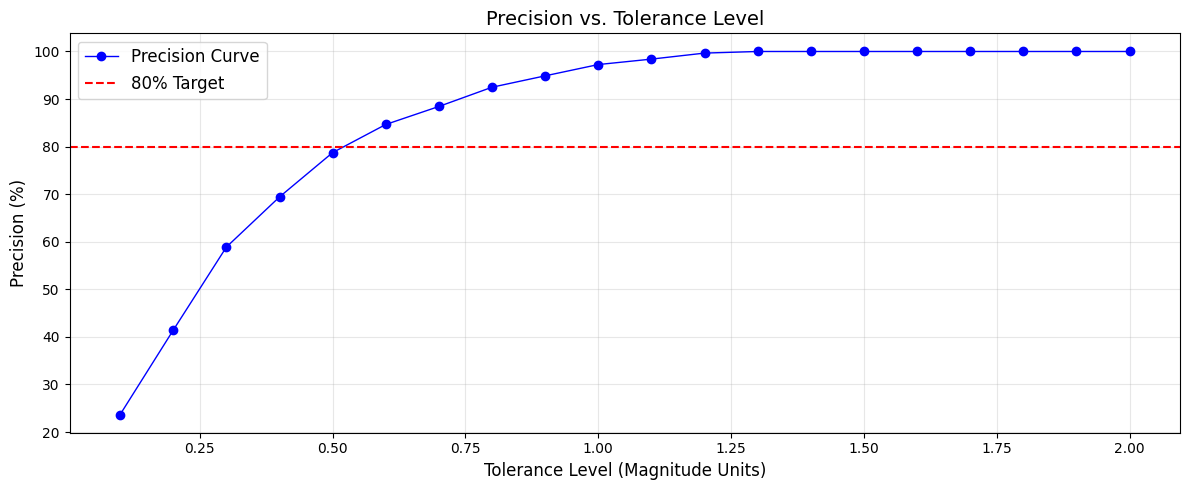

In [17]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()


# **LinearSVR**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
# Select features and target
X = sampled_data[['sig', 'nst', 'mmi', 'depth', 'latitude', 'longitude', 'cdi']]
y = sampled_data['magnitude']

# Clean
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [20]:
# Create and train SVM model
svm_reg = LinearSVR(C = 5, random_state = 42, max_iter = 10000)
svm_reg.fit(X_train, y_train)

# Predict
y_pred = svm_reg.predict(X_test)

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.102
RMSE: 0.289
MAE: 0.130


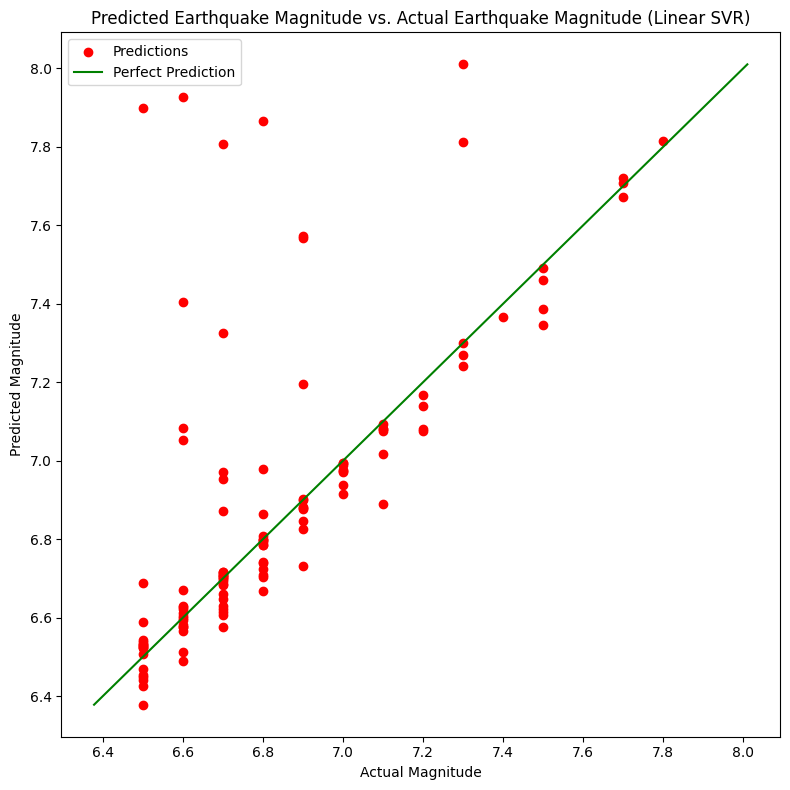

In [21]:
# Plot predicted magnitude vs the actual magnitude (SVR)
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred, color='red', label='Predictions')

# Define range for perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# In the line below - the perfect prediction (100% acuracy) line goes from min value of x and y axis to max value of x and y axis
plt.plot([min_val, max_val], [min_val, max_val], 'g-', label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Predicted Earthquake Magnitude vs. Actual Earthquake Magnitude (Linear SVR)')
plt.legend()
plt.tight_layout()  # Prevent label clipping
plt.show()


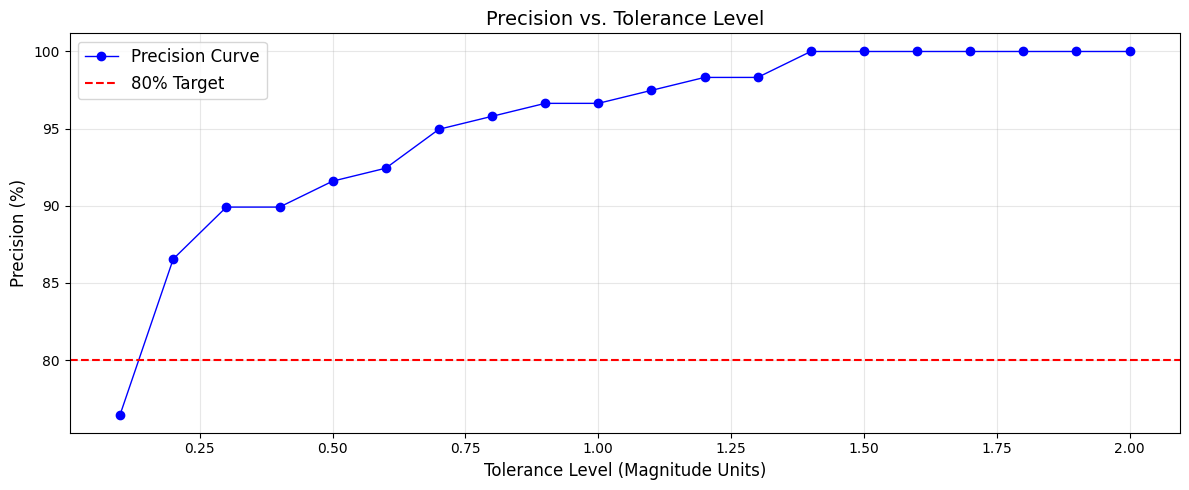

In [22]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()


# **SVR**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
# Select features and target
X = sampled_data[['sig', 'nst', 'mmi', 'depth', 'latitude', 'longitude','cdi']]
y = sampled_data['magnitude']

# Clean
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Create and train SVR model
svr = SVR(kernel = 'rbf', C = 5, gamma='auto')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.758
RMSE: 0.150
MAE: 0.100


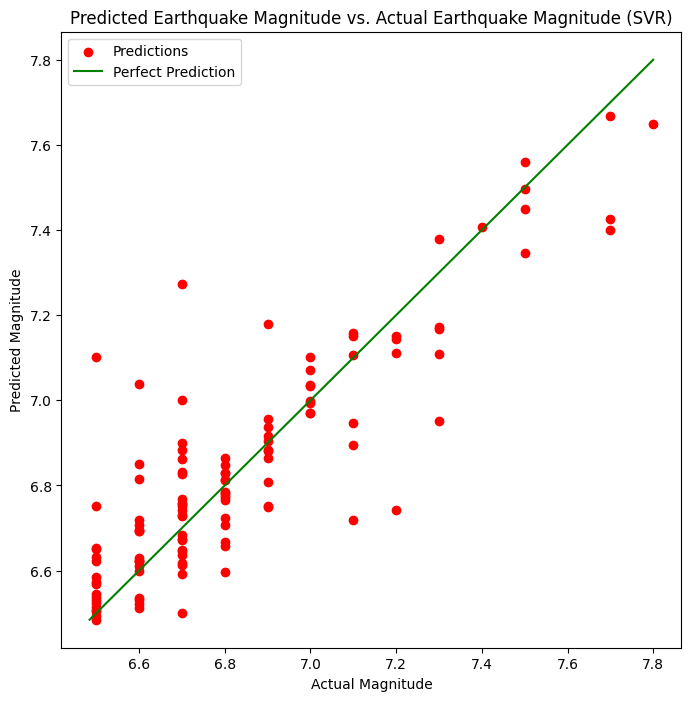

In [26]:
# Plot predicted magnitude vs the actual magnitude (SVR)
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred, color='red', label='Predictions')

# Define range for perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# In the line below - the perfect prediction (100% acuracy) line goes from min value of x and y axis to max value of x and y axis
plt.plot([min_val, max_val], [min_val, max_val], 'g-', label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Predicted Earthquake Magnitude vs. Actual Earthquake Magnitude (SVR)')
plt.legend()
plt.show()

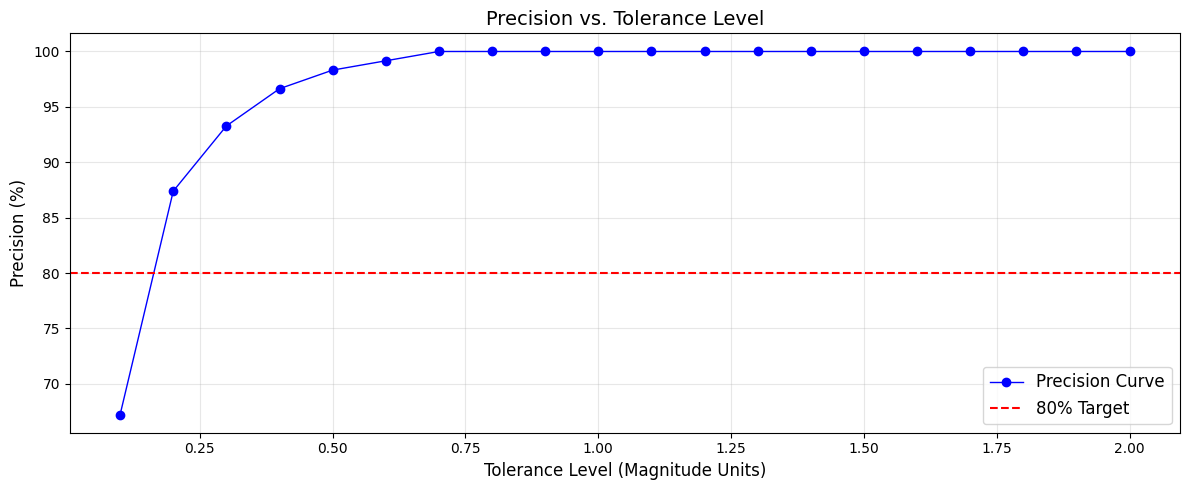

In [27]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()


# **KNN**

In [28]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [29]:
X_train = np.array(X_train).reshape(X_train.shape[0], -1)
X_test  = np.array(X_test).reshape(X_test.shape[0], -1)
y_train = np.array(y_train).reshape(-1)
y_test  = np.array(y_test).reshape(-1)

best_k = 5 # example
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.695
RMSE: 0.168
MAE: 0.124


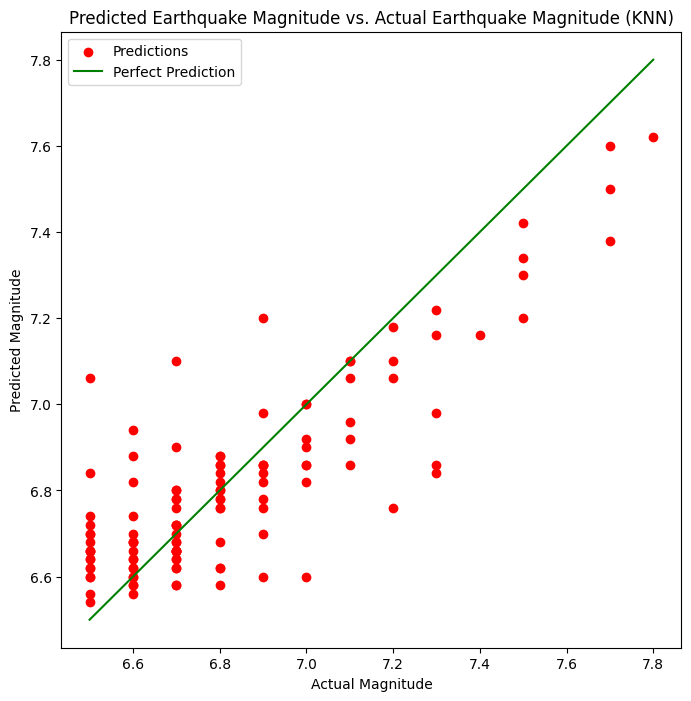

In [30]:
# Plot predicted magnitude vs the actual magnitude (SVR)
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred, color='red', label='Predictions')

# Define range for perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# In the line below - the perfect prediction (100% acuracy) line goes from min value of x and y axis to max value of x and y axis
plt.plot([min_val, max_val], [min_val, max_val], 'g-', label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Predicted Earthquake Magnitude vs. Actual Earthquake Magnitude (KNN)')
plt.legend()
plt.show()

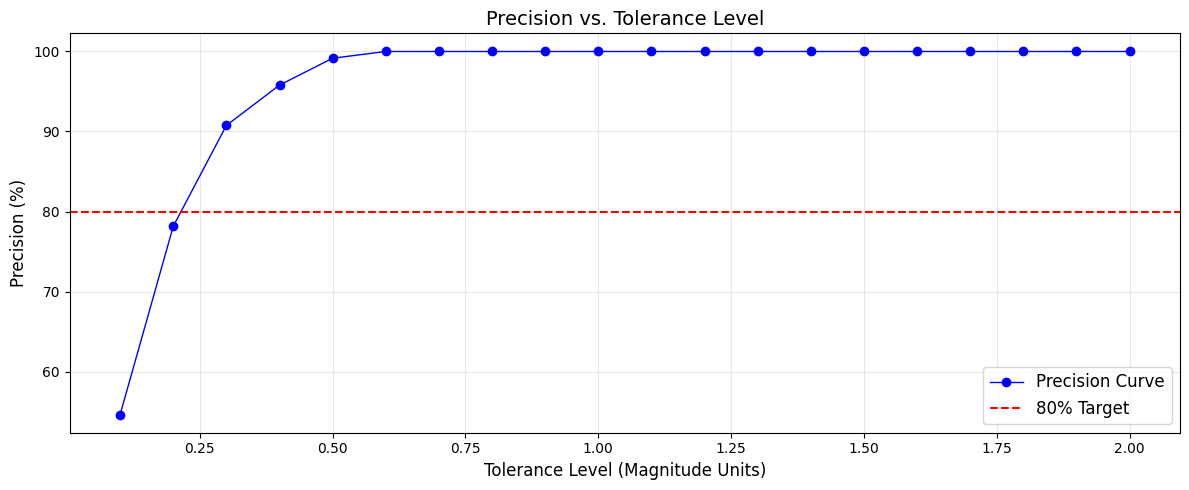

In [31]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()


# **XGB Regressor**

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R² Score: 0.752
RMSE: 0.152
MAE: 0.066


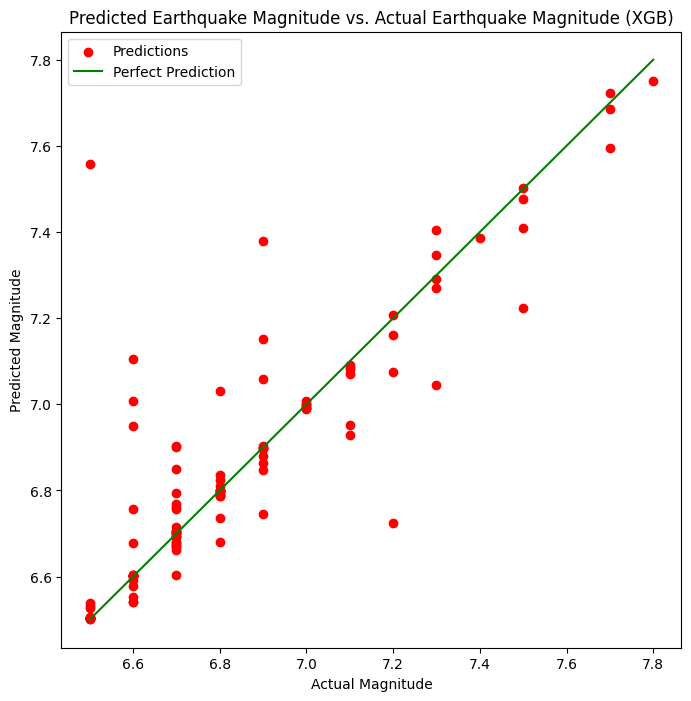

In [34]:
# Plot predicted magnitude vs the actual magnitude (SVR)
plt.figure(figsize = (8, 8))
plt.scatter(y_test, y_pred, color='red', label='Predictions')

# Define range for perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# In the line below - the perfect prediction (100% acuracy) line goes from min value of x and y axis to max value of x and y axis
plt.plot([min_val, max_val], [min_val, max_val], 'g-', label='Perfect Prediction')

plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Predicted Earthquake Magnitude vs. Actual Earthquake Magnitude (XGB)')
plt.legend()
plt.show()

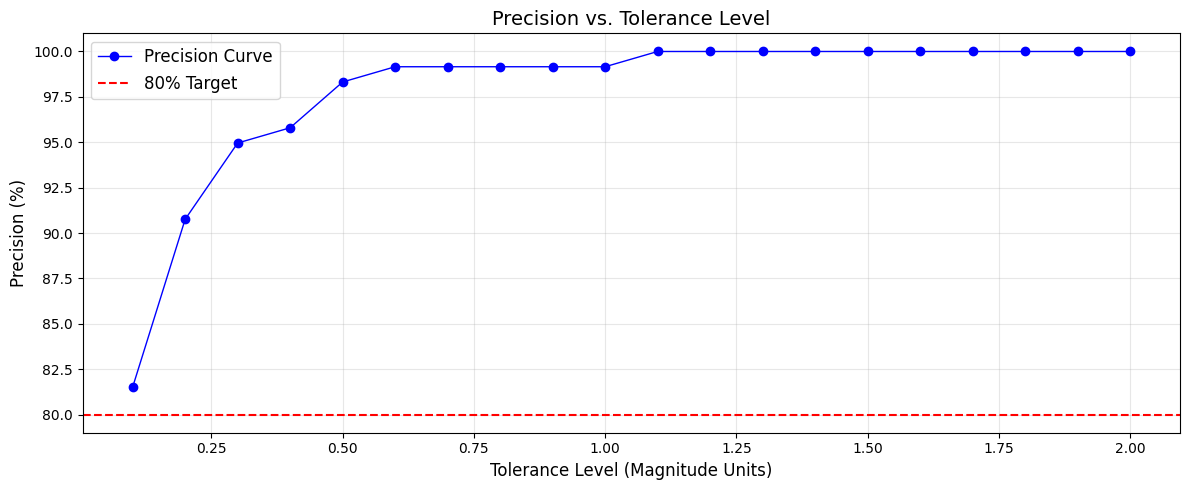

In [35]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()

# **MLP (Multilayer Perceptron)**

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf

reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Linear output
])

reg_model.compile(optimizer='adam', loss='mse')

# Train
reg_model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2, verbose=0)

# Predict and evaluate
y_pred = reg_model.predict(X_test).flatten()

# Evaluate
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred) # Average absolute difference between predicted and actual values.

print(f"R² Score: {r2_Score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R² Score: 0.683
RMSE: 0.171
MAE: 0.103


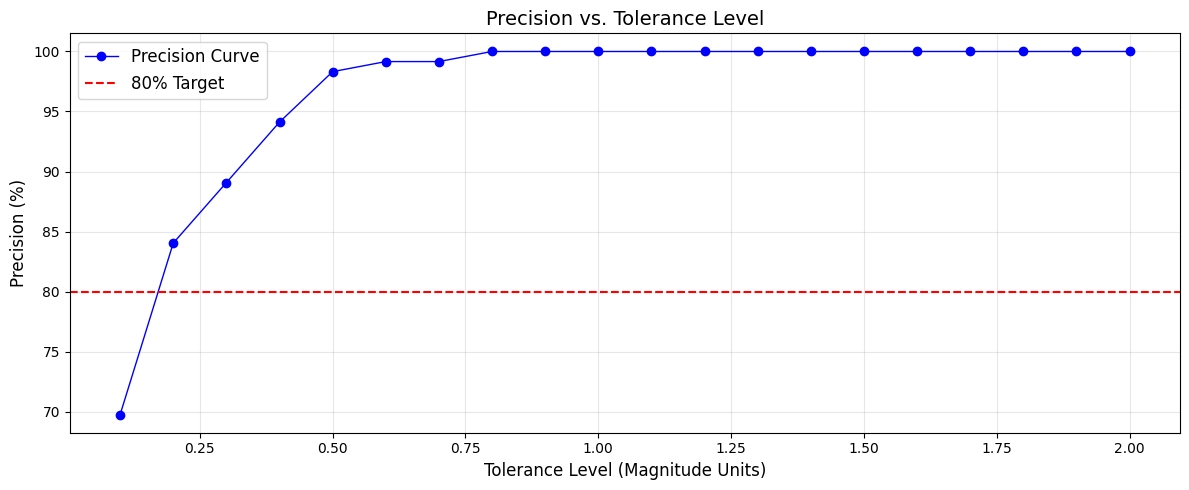

In [37]:
# Figure setup
plt.figure(figsize=(12, 5))

# Precision vs Tolerance
tolerance_levels = np.arange(0.1, 2.1, 0.1)
precision_scores = []
for tol in tolerance_levels:
    within_tolerance = np.abs(y_test - y_pred) <= tol
    precision = np.mean(within_tolerance) * 100
    precision_scores.append(precision)

# Plotting
plt.plot(tolerance_levels, precision_scores, 'b-o', linewidth=1, markersize=6, label='Precision Curve')
plt.xlabel('Tolerance Level (Magnitude Units)', fontsize=12)
plt.ylabel('Precision (%)', fontsize=12)
plt.title('Precision vs. Tolerance Level', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=80, color='r', linestyle='--', label='80% Target')
plt.legend(fontsize=12)
plt.tight_layout()  # Prevent label clipping
plt.show()
